In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### First we want to find the relationship between the median prices paid by MSOA(2023) and the distances to the HS2, we use Median price paid by MSOA2023 and Median price paid (existing dwellings) by MSOA2023

In [103]:
# Load data
data = pd.read_csv('/home/jovyan/work/Desktop/University/UCL/MSc/CASA0007/presentation/birmingham median prices 2023.csv')

In [104]:
data.head()

,MSOA code,MSOA name,distance from HS2(km),Median price paid by MSOA2023,Median price paid for detached houses by MSOA2023,Median price paid for semi-detached houses by MSOA2023,Median price paid for terraced houses by MSOA2023,Median price paid for flats/maisonettes by MSOA2023,Median price paid (newly built dwellings) by MSOA2023,Median price paid (newly built dwellings) for detached houses by MSOA2023,Median price paid (newly built dwellings) for semi-detached houses by MSOA2023,Median price paid (newly built dwellings) for terraced houses by MSOA2023,Median price paid (newly built dwellings) for flats/maisonettes by MSOA2023,Median price paid (existing dwellings) by MSOA2023,Median price paid (existing dwellings) for detached houses by MSOA2023,Median price paid (existing dwellings) for semi-detached houses by MSOA2023,Median price paid (existing dwellings) for terraced houses by MSOA2023,Median price paid (existing dwellings) for flats/maisonettes by MSOA2023
0,E02001827,Birmingham 001,13.43,410000.0,615000.0,375000.0,385000.0,160000.0,NaN,NaN,NaN,NaN,NaN,410000.0,615000.0,375000.0,385000.0,160000.0
1,E02001828,Birmingham 002,12.87,380000.0,645000.0,387500.0,315000.0,192500.0,NaN,NaN,NaN,NaN,NaN,380000.0,645000.0,387500.0,315000.0,192500.0
2,E02001829,Birmingham 003,13.10,415000.0,590000.0,410000.0,302000.0,195000.0,NaN,NaN,NaN,NaN,NaN,415000.0,590000.0,410000.0,302000.0,195000.0
3,E02001830,Birmingham 004,10.33,525500.0,795000.0,525000.0,235000.0,190000.0,NaN,NaN,NaN,NaN,NaN,525500.0,795000.0,525000.0,235000.0,190000.0
4,E02001831,Birmingham 005,11.28,280000.0,400000.0,295000.0,270000.0,123500.0,NaN,NaN,NaN,NaN,NaN,280000.0,400000.0,295000.0,270000.0,123500.0


In [105]:
#build the model using the overall data
#Median price paid (newly built dwellings) by MSOA2023  
#there being no house sales or fewer than five house sales of that particular type in the given year for the selected geography. 
#These are suppressed as fewer than 5 sales is not deemed enough to produce a robust average 
X = data[['distance from HS2(km)']]
Y = data[['Median price paid by MSOA2023', 'Median price paid (existing dwellings) by MSOA2023']]

In [106]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [107]:
# Create a multivariate linear regression model
model = LinearRegression()

In [108]:
# Fit the model
model.fit(X_train, Y_train)

LinearRegression()

In [109]:
# Make predictions
Y_pred = model.predict(X_test)

In [110]:
# Evaluate the model for each target
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    r2 = r2_score(Y_test.iloc[:, i], Y_pred[:, i])
    print(f'Target {i+1} - MSE: {mse}, R2: {r2}')

Target 1 - MSE: 2658295768.3166203, R2: 0.2601132448764427
Target 2 - MSE: 2640114709.562591, R2: 0.2653348330557923


In [113]:
# Plotting the predictions for both targets on the same plot
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'Median price paid by MSOA2023(pounds)')

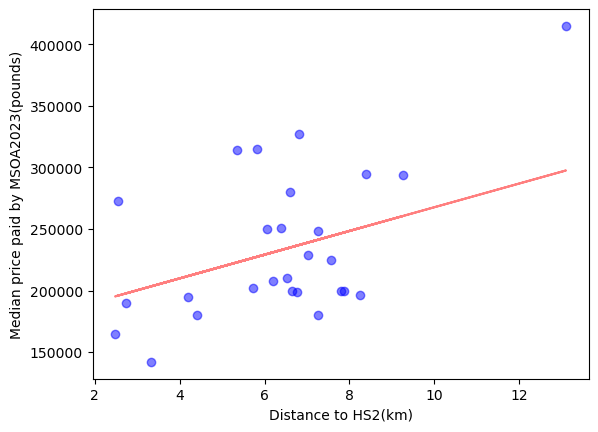

In [114]:
# Plot actual vs. predicted values for target1
plt.scatter(X_test, Y_test['Median price paid by MSOA2023'], color='blue', label='Actual Median price paid by MSOA2023', alpha=0.5)
plt.plot(X_test, Y_pred[:, 0], color='red', label='Predicted Median price paid by MSOA2023', alpha=0.5)
plt.xlabel('Distance to HS2(km)')
plt.ylabel('Median price paid by MSOA2023(pounds)')

Median price paid by MSOA2023 - MSE: 2658295768.3166203, R2: 0.2601132448764427

Text(0, 0.5, 'Median price paid (existing dwellings) by MSOA2023(pounds)')

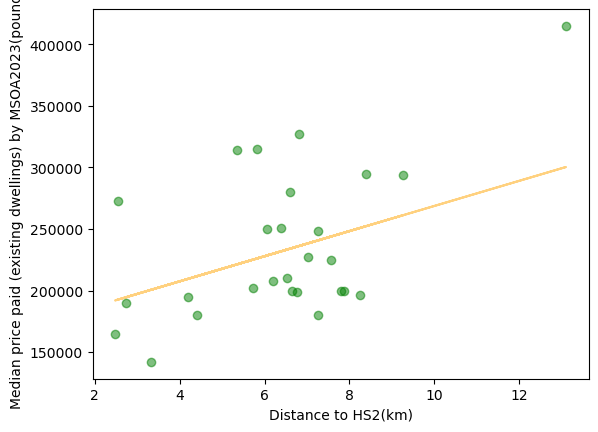

In [115]:
# Plot actual vs. predicted values for target2
plt.scatter(X_test, Y_test['Median price paid (existing dwellings) by MSOA2023'], color='green', label='Actual Median price paid (existing dwellings) by MSOA2023', alpha=0.5)
plt.plot(X_test, Y_pred[:, 1], color='orange', label='Actual Median price paid (existing dwellings) by MSOA2023', alpha=0.5)
plt.xlabel('Distance to HS2(km)')
plt.ylabel('Median price paid (existing dwellings) by MSOA2023(pounds)')

Median price paid (existing dwellings) by MSOA2023 - MSE: 2640114709.562591, R2: 0.2653348330557923

### Next we want to find the relationship between the house prices from 2013(before HS2 was built) to 2023(after HS2 was built)

In [135]:
# Load data
data = pd.read_csv('/home/jovyan/work/Desktop/University/UCL/MSc/CASA0007/presentation/median prices and year.csv')

In [136]:
data.head()

,MSOA code,MSOA name,Year ending Mar 2013,Year ending Jun 2013,Year ending Sep 2013,Year ending Dec 2013,Year ending Mar 2014,Year ending Jun 2014,Year ending Sep 2014,Year ending Dec 2014,...,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022,Year ending Mar 2023
0,E02001827,Birmingham 001,"210,000","211,000","213,500","236,000","249,950","238,000","246,000","241,250",...,"392,500","375,000","385,000","378,000","367,500","380,000","368,750","389,000","405,000","410,000"
1,E02001828,Birmingham 002,"220,000","226,000","230,000","232,000","230,975","224,000","235,000","245,000",...,"350,000","396,000","395,000","383,500","381,000","347,500","348,750","388,500","372,500","380,000"
2,E02001829,Birmingham 003,"238,100","218,975","215,000","216,000","215,000","225,000","230,625","240,000",...,"358,250","392,500","400,000","384,000","390,000","387,500","390,000","407,000","410,000","415,000"
3,E02001830,Birmingham 004,"282,000","278,250","291,000","292,250","306,250","320,000","320,000","335,000",...,"499,950","500,000","500,000","486,250","475,000","475,000","425,000","487,500","522,500","525,500"
4,E02001831,Birmingham 005,"162,250","156,750","158,000","159,750","160,000","166,500","170,000","170,000",...,"245,000","248,700","257,000","255,000","252,750","257,500","255,000","268,500","275,000","280,000"


In [137]:
# Convert price columns from string to float and handle missing values
for col in data.columns[2:]:
    data[col] = data[col].str.replace(',', '').astype(float)

#### First we choose Birmingham 001 as a example of the area far away from the station

In [138]:
# Selecting data for the first MSOA area as an example
msoa_birmingham_001 = data.iloc[0, 2:]

In [139]:
# Create a DataFrame with time and price
time_points = np.arange(len(msoa_birmingham_001)) + 1
prices = msoa_birmingham_001.values
time_price_data = pd.DataFrame({'Time': time_points, 'Price': prices})

In [140]:
# Prepare data for modeling
X = time_price_data[['Time']]
y = time_price_data['Price']

In [141]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [142]:
# Predict prices
time_price_data['Predicted_Price'] = model.predict(X)

In [143]:
# Calculating R-squared and Mean Squared Error (MSE)
r_squared = r2_score(y, time_price_data['Predicted_Price'])
mse = mean_squared_error(y, time_price_data['Predicted_Price'])

print(f"R-squared (R²): {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared (R²): 0.9203541137789072
Mean Squared Error (MSE): 273228569.5589359


In [144]:
# Extract the coefficients and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Function format: y = mx + c
function_of_line = f'y = {slope:.2f}x + {intercept:.2f}'

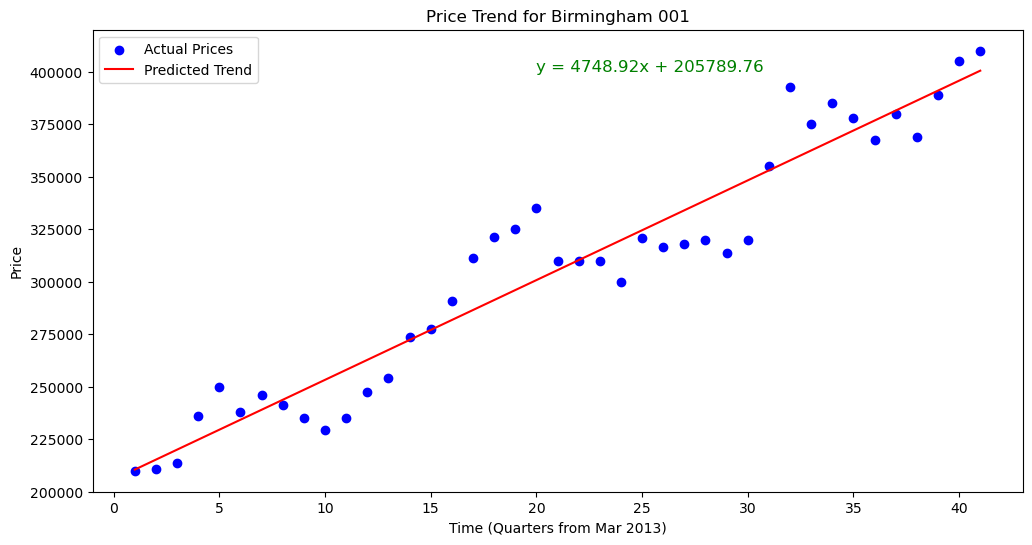

In [145]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(time_price_data['Time'], time_price_data['Price'], color='blue', label='Actual Prices')
plt.plot(time_price_data['Time'], time_price_data['Predicted_Price'], color='red', label='Predicted Trend')
plt.xlabel('Time (Quarters from Mar 2013)')
plt.ylabel('Price')
plt.title(f'Price Trend for {data.iloc[0]["MSOA name"]}')
plt.legend()
plt.text(20, 400000, function_of_line, fontsize=12, color='green')  
plt.show()

#### Then we choose Birmingham 050 as a example of the area close to the station

In [146]:
# Selecting data for the 50th MSOA area as an example
msoa_birmingham_050 = data[data['MSOA name'] == 'Birmingham 050'].iloc[0, 2:]

In [147]:
# Create a DataFrame with time and price
time_points = np.arange(len(msoa_birmingham_050)) + 1
prices =msoa_birmingham_050.values
time_price_data = pd.DataFrame({'Time': time_points, 'Price': prices})

In [148]:
# Prepare data for modeling
X = time_price_data[['Time']]
y = time_price_data['Price']

In [149]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [150]:
# Predict prices
time_price_data['Predicted_Price'] = model.predict(X)

In [151]:
# Calculating R-squared and Mean Squared Error (MSE)
r_squared = r2_score(y, time_price_data['Predicted_Price'])
mse = mean_squared_error(y, time_price_data['Predicted_Price'])

print(f"R-squared (R²): {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared (R²): 0.7338430961887221
Mean Squared Error (MSE): 336674305.88051325


In [152]:
# Extract the coefficients and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Function format: y = mx + c
function_of_line = f'y = {slope:.2f}x + {intercept:.2f}'

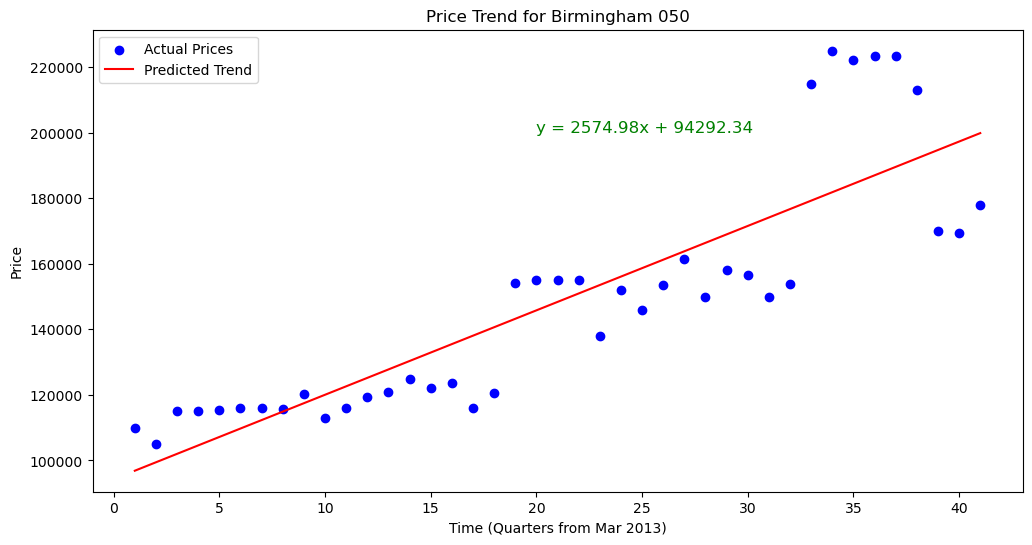

In [153]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(time_price_data['Time'], time_price_data['Price'], color='blue', label='Actual Prices')
plt.plot(time_price_data['Time'], time_price_data['Predicted_Price'], color='red', label='Predicted Trend')
plt.xlabel('Time (Quarters from Mar 2013)')
plt.ylabel('Price')
plt.title(f'Price Trend for Birmingham 050')
plt.legend()
plt.text(20, 200000, function_of_line, fontsize=12, color='green')  
plt.show()